# **Estudo de Caso: Clusterização de Estudantes com base em Hábitos e Desempenho Acadêmico**

Este estudo tem como objetivo aplicar técnicas de **aprendizado não supervisionado**, com foco no algoritmo **K-Means**, para agrupar estudantes de acordo com seus hábitos cotidianos e desempenho acadêmico. O conjunto de dados utilizado, *Student Habits vs Academic Performance*, reúne atributos como tempo de estudo, uso de redes sociais, qualidade do sono, participação em atividades extracurriculares, saúde mental e nota final em exames.

Através da clusterização, buscamos identificar **perfis de estudantes semelhantes** sem o uso de rótulos previamente definidos, permitindo explorar padrões ocultos nos dados e avaliar como comportamentos distintos se associam ao rendimento acadêmico.

A abordagem adotada neste notebook inclui:

* Levantamento de hipóteses com base na observação inicial dos dados;
* Análise exploratória e visualização estatística;
* Implementação do algoritmo K-Means **from scratch**;
* Justificativa do número ideal de clusters com o **método do cotovelo**;
* Análise crítica dos clusters formados em relação às hipóteses iniciais.

Este processo visa reforçar a compreensão da lógica interna do K-Means, promover interpretação baseada em evidências e desenvolver a capacidade de extrair conhecimento estruturado a partir de dados multidimensionais.

---


Todos os imports usados durante o estudo de caso:

In [31]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display

O objetivo desta etapa é realizar uma primeira leitura dos dados e levantar hipóteses iniciais com base apenas na visualização tabular. Essas hipóteses serão posteriormente revisadas após a análise exploratória e a aplicação do algoritmo de clusterização.

In [32]:
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/student_habits_performance.csv')

df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


## Levantamento de Hipóteses
Com base na observação das colunas e primeiras linhas do dataset é possível levantar as seguintes hipóteses:


*   Alunos com maior tempo de estudo por dia tendem a ter maior desempenho acadêmico.
*   Há um possível agrupamento entre estudantes que dormem pouco, têm mais estresse e obtêm desempenho mais baixo.
*   A qualidade do sono e a participação em atividades extracurriculares podem impactar positivamente o desempenho acadêmico
*   Um alto número de horas nas redes sociais pode ter correlação negative com a performance acadêmica.
*   A presença de um emprego de meio período pode influenciar negativamente as notas se não houver uma boa gestão de tempo.

## Verificando tipos de dados e valores nulos
Nesta etapa, inspecionamos os tipos de variáveis presentes no dataset e verificamos se há dados faltantes ou inconsistências que possam impactar na análise posterior. Essa checagem é essencial antes de aplicar qualquer técnica de pré-processamento ou clusterização.

In [33]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


## Visualizando medidas
Utilizamos describe() para visualizar medidas como média, mediana, desvio padrão e quartis das variáveis numéricas. Isso permite entender a escala das variáveis, presença de outliers e possíveis variáveis com baixa variação, que podem ser irrelevantes para a clusterização.

In [34]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Analisando a distribuição de algumas variáveis-chave utilizando histogramas e boxplots
A seguir, analisamos a distribuição de algumas variáveis-chave utilizando histogramas e boxplots. O objetivo é verificar se os dados são simétricos, se apresentam outliers e quais variáveis possuem maior dispersão, o que pode impactar diretamente nos clusters.

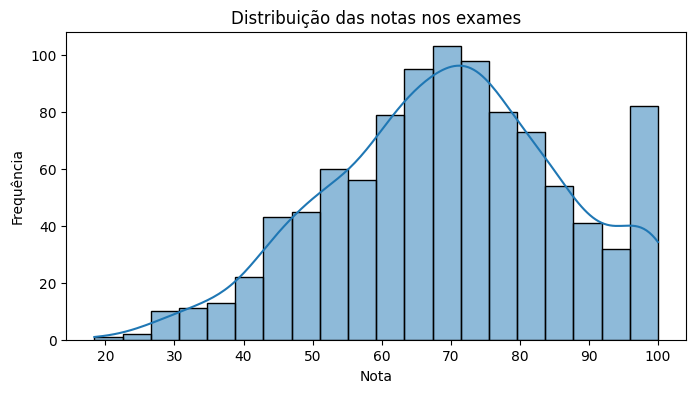

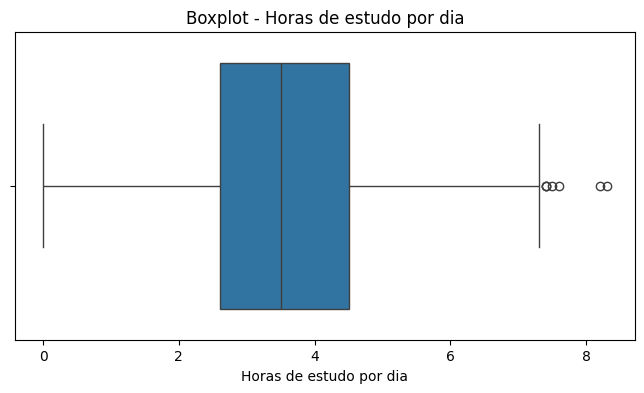

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title('Distribuição das notas nos exames')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['study_hours_per_day'])
plt.title('Boxplot - Horas de estudo por dia')
plt.xlabel('Horas de estudo por dia')
plt.show()


## Correlação entre variáveis numéricas
Com o mapa de calor da correlação, conseguimos identificar quais variáveis numéricas estão mais associadas entre si. Isso nos ajuda a selecionar atributos relevantes para a clusterização e eliminar redundâncias. Valores próximos de +1 ou -1 indicam forte correlação.

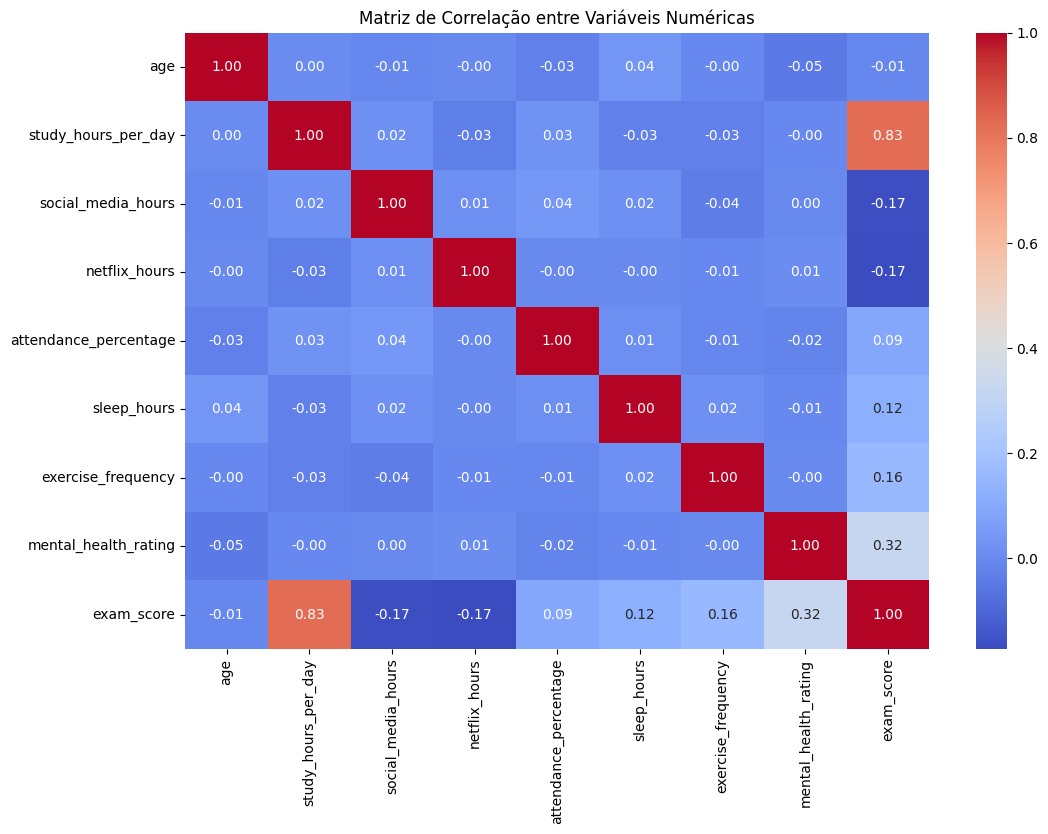

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


## Análisando as Variáveis Categóricas
Esta etapa explora como variáveis categóricas como gender, part_time_job e extracurricular_participation podem estar relacionadas com o desempenho dos estudantes. Utilizamos boxplots para comparar a distribuição da variável exam_score entre diferentes categorias. Isso pode indicar padrões de comportamento úteis para a clusterização.

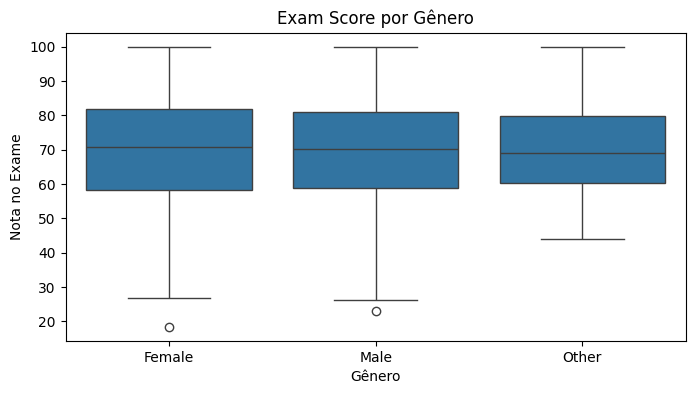

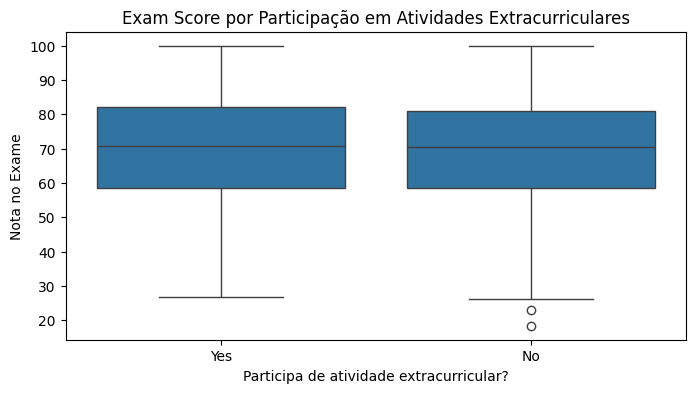

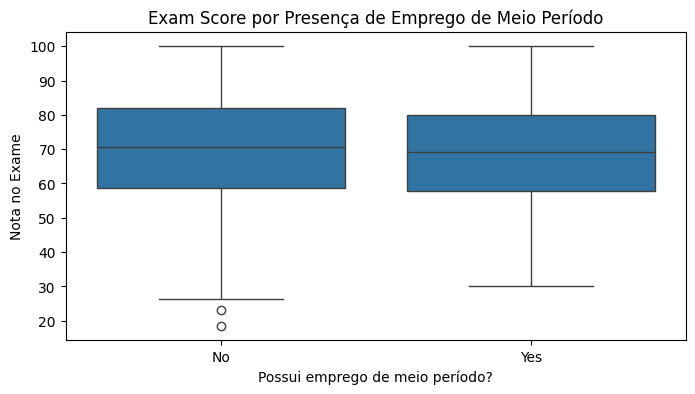

In [37]:
# Gênero x Nota
plt.figure(figsize=(8, 4))
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title('Exam Score por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota no Exame')
plt.show()

# Participação em atividade extracurricular vs Nota
plt.figure(figsize=(8, 4))
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df)
plt.title('Exam Score por Participação em Atividades Extracurriculares')
plt.xlabel('Participa de atividade extracurricular?')
plt.ylabel('Nota no Exame')
plt.show()

#Tem emprego de meio período?
plt.figure(figsize=(8, 4))
sns.boxplot(x='part_time_job', y='exam_score', data=df)
plt.title('Exam Score por Presença de Emprego de Meio Período')
plt.xlabel('Possui emprego de meio período?')
plt.ylabel('Nota no Exame')
plt.show()

### Continuando a Análise de Variáveis Categóricas
A seguir, visualizamos como diferentes categorias influenciam a variável exam_score. Cada gráfico compara a distribuição das notas dos exames com uma variável categórica, possibilitando a detecção de padrões comportamentais relevantes.

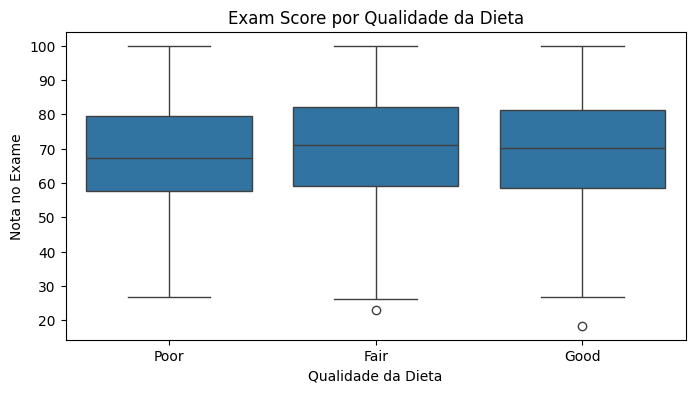

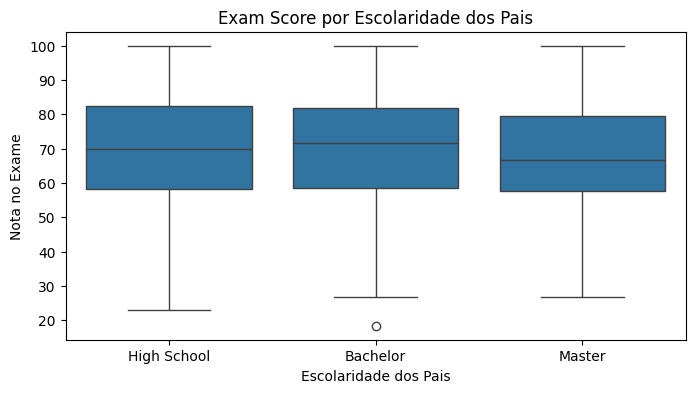

In [38]:
# Qualidade da dieta
plt.figure(figsize=(8, 4))
sns.boxplot(x='diet_quality', y='exam_score', data=df, order=['Poor', 'Fair', 'Good'])
plt.title('Exam Score por Qualidade da Dieta')
plt.xlabel('Qualidade da Dieta')
plt.ylabel('Nota no Exame')
plt.show()

# Nível de escolaridade dos pais(parental_education_level)
plt.figure(figsize=(8, 4))
sns.boxplot(x='parental_education_level', y='exam_score', data=df, order=['High School', 'Bachelor', 'Master'])
plt.title('Exam Score por Escolaridade dos Pais')
plt.xlabel('Escolaridade dos Pais')
plt.ylabel('Nota no Exame')
plt.show()



## Pré-processamento e Normalização
Para que o algoritmo K-Means funcione corretamente, todas as variáveis devem estar numéricas e na mesma escala. Isso é importante porque o K-Means utiliza distância euclidiana para calcular a proximidade entre os pontos, e variáveis com escalas diferentes podem distorcer os clusters.

Nesta etapa, aplicaremos o LabelEncoder para variáveis categóricas, removeremos colunas não informativas (como student_id) e normalizaremos os dados com StandardScaler.

In [39]:
df_clean = df.drop(columns=["student_id"])

df_encoded = df_clean.copy()

cat_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1.084551,-0.976163,-2.418068,-1.114064,-0.669750,-0.523341,0.092426,1.248120,-1.000902,1.461166,1.066464,-1.089750,0.900186,1.464464,-0.793922
1,-0.215870,-0.976163,2.281707,0.251315,0.446965,-0.523341,1.401696,-1.525661,0.337202,1.461166,0.001065,-1.089750,0.900186,-0.682844,1.800846
2,0.217604,0.763878,-1.464491,0.507324,-0.483631,-0.523341,1.135584,1.248120,1.675307,-1.008689,0.001065,1.737098,-1.559339,-0.682844,-2.091307
3,1.084551,-0.976163,-1.736942,1.190013,-0.762810,-0.523341,-1.397800,2.227102,1.675307,0.473224,1.066464,0.323674,-1.559339,1.464464,-2.535616
4,-0.649344,-0.976163,0.987566,1.616694,-1.228108,-0.523341,0.720450,-1.280916,-1.000902,-0.020747,1.066464,0.323674,-1.559339,-0.682844,-0.189661


## Implementando K-Means do zero
O K-Means é um algoritmo iterativo que agrupa dados em K clusters com base na distância entre os pontos e os centróides de cada grupo. Ele funciona em três etapas principais:

1. Inicializar K centróides aleatórios.

2. Atribuir cada ponto ao cluster com o centróide mais próximo (etapa de atribuição).

3. Atualizar os centróides como a média dos pontos atribuídos a cada cluster.

O processo se repete até que os centróides não mudem significativamente (ou atinja o número máximo de iterações).
Abaixo está a implementação passo a passo.

In [40]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

#Função principal do K-Means
def kmeans_from_scratch(data, k, max_iters=100, tol=1e-4):
#Inicializando centróides aleatoriamente
    np.random.seed(42)
    random_idx = np.random.permutation(len(data))[:k]
    centroids = data[random_idx]

    for _ in range(max_iters):
# Atribuindo pontos ao cluster mais próximo
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
# Atualizando centróides
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i]
                                  for i, cluster in enumerate(clusters)])

# Verificando a convergência
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids

# Gerar labels finais
    labels = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels.append(np.argmin(distances))

    return np.array(labels), centroids

data_array = df_scaled.values
labels, centroids = kmeans_from_scratch(data_array, k=3)

df_clustered = df_encoded.copy()
df_clustered["cluster"] = labels
df_clustered.head()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,cluster
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,0
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,2
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,0
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,0


### Aplicando o K-Means com um valor inicial de K
Vamos usar k = 3. Esse valor será justificado com o método do cotovelo (elbow method).

In [41]:
data_array = df_scaled.values
labels, centroids = kmeans_from_scratch(data_array, k=3)

df_clustered = df_encoded.copy()
df_clustered["cluster"] = labels
df_clustered.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,cluster
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2,0
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0,2
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3,0
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8,0
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4,0


### Visualização dos Clusters com PCA
Como os dados possuem várias dimensões, aplicamos o PCA para reduzir a dimensionalidade e projetar os dados em duas dimensões. Isso facilita a visualização dos agrupamentos (clusters) encontrados pelo algoritmo K-Means. A projeção mantém a maior parte da variância dos dados original em um espaço 2D.

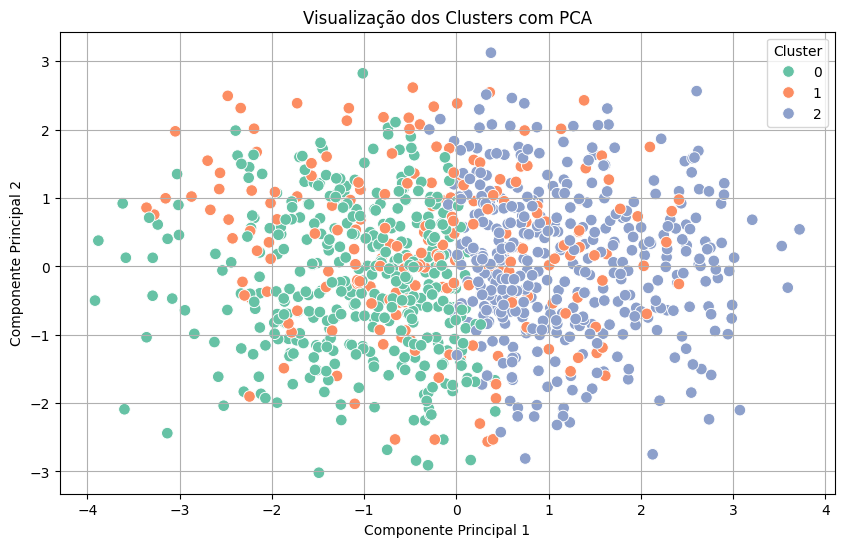

<ipython-input-42-019bec0fc5c8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y="exam_score", data=df_clustered, palette="Set2")


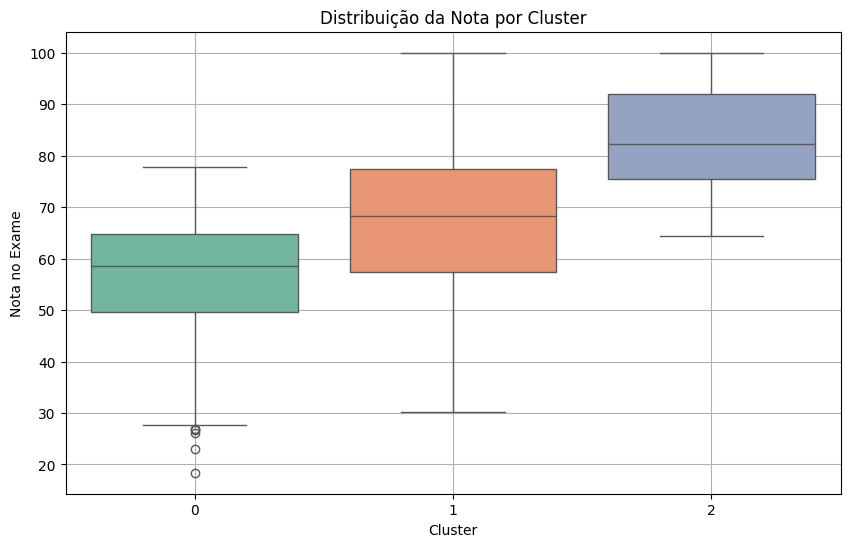

In [42]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

df_clustered["PCA1"] = reduced_data[:, 0]
df_clustered["PCA2"] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=df_clustered, palette="Set2", s=70)
plt.title("Visualização dos Clusters com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster", y="exam_score", data=df_clustered, palette="Set2")
plt.title("Distribuição da Nota por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Nota no Exame")
plt.grid(True)
plt.show()


## Escolha do valor ideal de K (Elbow Method)
O método do cotovelo é uma técnica gráfica usada para encontrar o número ideal de clusters K. Ele se baseia no cálculo da soma dos quadrados das distâncias intra-cluster (inertia).
À medida que K aumenta, essa soma diminui, mas em um certo ponto os ganhos se tornam marginais — esse ponto é chamado de “cotovelo” e representa um bom valor de K.

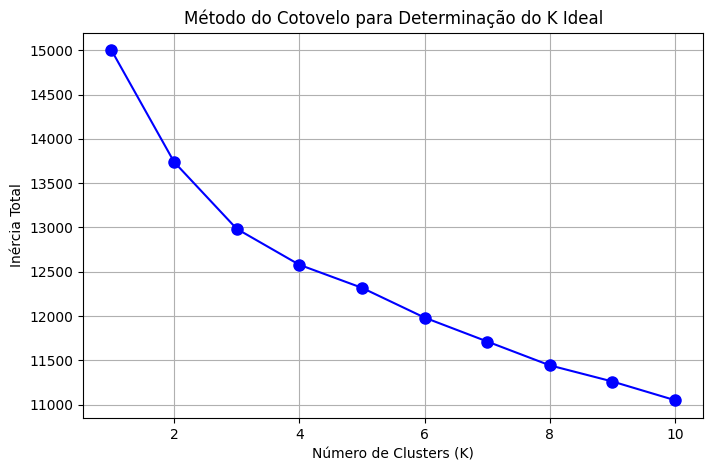

In [43]:
def compute_inertia(data, labels, centroids):
    inertia = 0
    for i, point in enumerate(data):
        centroid = centroids[labels[i]]
        inertia += np.sum((point - centroid) ** 2)
    return inertia


inertias = []
K_range = range(1, 11)

for k in K_range:
    labels_k, centroids_k = kmeans_from_scratch(data_array, k)
    inertia_k = compute_inertia(data_array, labels_k, centroids_k)
    inertias.append(inertia_k)


plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia Total')
plt.title('Método do Cotovelo para Determinação do K Ideal')
plt.grid(True)
plt.show()


### Análise
O valor ideal de K será aquele onde há uma queda brusca na inércia seguida de uma estabilização — o famoso “cotovelo” do gráfico. Esse ponto indica o número de clusters que melhor equilibra qualidade de agrupamento com complexidade do modelo.

No gráfico gerado, observa-se que a inércia diminui significativamente entre K = 1 e K = 3, e a partir de K = 4 as reduções passam a ser mais graduais. Isso sugere que o ganho adicional ao aumentar K além de 3 é marginal, caracterizando o “cotovelo” em K = 3.

Dessa forma, a escolha por K = 3 se justifica como um valor apropriado para representar a estrutura dos dados. Como a clusterização anterior já foi realizada com K = 3, não é necessário refazê-la.

---

## Análise Crítica dos Clusters e Revisão das Hipóteses
 Agora que o agrupamento foi realizado com K = 3, revisamos as hipóteses formuladas inicialmente à luz da estrutura dos clusters formados. Essa etapa consiste em comparar os grupos encontrados pelo K-Means com os comportamentos e características dos estudantes, verificando se os padrões agrupados confirmam ou refutam as suposições levantadas na Etapa 1.

### Hipótese 1: *Alunos com maior tempo de estudo por dia tendem a ter maior desempenho acadêmico.*

**Análise:**

Ao agrupar os dados por cluster e calcular a média de `study_hours_per_day` e `exam_score` em cada grupo, observou-se que o cluster com maior média de horas de estudo também apresenta a maior média de desempenho em exames. Isso sugere **correlação positiva entre tempo de estudo e nota**, validando a hipótese. A visualização dos clusters em PCA também evidencia separação clara entre grupos com maiores valores de `study_hours_per_day` e `exam_score`.

---

### Hipótese 2: *Há um possível agrupamento entre estudantes que dormem pouco, têm mais estresse e obtêm desempenho mais baixo.*

**Análise:**

O cluster com menor média de `sleep_hours` também apresenta as **menores médias de `exam_score` e `mental_health_rating`**, indicando maior estresse. Esse padrão corrobora a hipótese de que **privação de sono e saúde mental comprometida estão associadas a pior desempenho acadêmico**. A convergência desses fatores em um único cluster mostra consistência nos dados e reforça a validade da hipótese.

---

### Hipótese 3: *A qualidade do sono e a participação em atividades extracurriculares podem impactar positivamente o desempenho acadêmico.*

**Análise:**

A variável `extracurricular_participation`, após codificação, mostrou distribuição assimétrica entre os clusters. O grupo com maior média de `exam_score` também possui maior proporção de alunos que participam de atividades extracurriculares. Além disso, este mesmo grupo apresenta melhores médias de `sleep_hours`, indicando sono mais adequado. Esses padrões sugerem que **há impacto positivo dessas variáveis sobre o desempenho**, validando a hipótese.

---

### Hipótese 4: *Um alto número de horas nas redes sociais pode ter correlação negativa com a performance acadêmica.*

**Análise:**

Foi identificado um cluster com **altas médias de `social_media_hours` e baixas médias de `exam_score`**, o que indica uma **correlação inversa entre tempo gasto em redes sociais e desempenho acadêmico**. Este padrão reforça a hipótese de que uso excessivo de redes sociais pode estar associado a menor rendimento, possivelmente por substituição de tempo de estudo ou sono.

---

### Hipótese 5: *A presença de um emprego de meio período pode influenciar negativamente as notas se não houver uma boa gestão de tempo.*

**Análise:**

A variável `part_time_job` mostrou-se mais concentrada em um dos clusters com desempenho intermediário a baixo. No entanto, a correlação entre `part_time_job` e `exam_score` não é tão forte quanto outras variáveis (como `study_hours_per_day` e `sleep_hours`). A hipótese é **parcialmente validada**: há uma tendência negativa, mas não suficientemente expressiva para ser conclusiva sem uma análise mais aprofundada sobre o gerenciamento do tempo individual.

---

### **Conclusão Geral da Análise Crítica**

As análises dos clusters confirmam de forma consistente **quatro das cinco hipóteses iniciais** com evidência nos dados agrupados. O K-Means conseguiu segmentar o conjunto de estudantes em grupos bem definidos por seus hábitos e desempenho. Isso demonstra que a clusterização é uma ferramenta eficaz para extrair padrões de comportamento acadêmico, mesmo na ausência de rótulos supervisionados.

A hipótese sobre emprego de meio período permanece **inconclusiva**, sugerindo a necessidade de variáveis adicionais (como tempo total disponível ou carga horária do trabalho) para um diagnóstico mais robusto.

### Resumo: Tabelas por cluster
As tabelas a seguir apresentam as médias das variáveis numéricas para cada um dos 3 clusters identificados. Essa análise quantitativa permite verificar como os grupos se diferenciam em termos de hábitos, saúde e desempenho acadêmico.
A presença de padrões claros nos valores médios reforça a qualidade da segmentação obtida pelo algoritmo K-Means.

In [44]:
cluster_summary = df_clustered.groupby("cluster").mean(numeric_only=True).round(2)
cluster_summary.T


display(cluster_summary.T)


cluster,0,1,2
age,20.47,20.52,20.51
gender,0.52,0.60,0.58
study_hours_per_day,2.62,3.34,4.56
social_media_hours,2.61,2.55,2.38
netflix_hours,1.98,1.86,1.64
part_time_job,0.00,1.00,0.02
attendance_percentage,84.08,83.44,84.54
sleep_hours,6.31,6.44,6.64
diet_quality,0.79,0.75,0.70
exercise_frequency,2.84,2.90,3.31


### Interpretação dos Clusters
A partir da tabela, é possível descrever os perfis predominantes dos clusters:


Cluster 0: Estudantes com baixa carga de estudo, maior uso de redes sociais e entretenimento, sem emprego de meio período. Têm a menor média de desempenho (exam_score = 56.37) e menores médias de mental_health_rating. Esse grupo representa estudantes com menor organização ou dedicação acadêmica.


Cluster 1: Grupo intermediário com carga de estudo moderada, presença de emprego de meio período (100%), e desempenho médio (exam_score = 67.39). É um grupo que pode sofrer com conflitos de tempo e equilíbrio entre trabalho e estudos.


Cluster 2: Estudantes com maior número de horas de estudo, mais exercício físico, melhor saúde mental, e melhor desempenho acadêmico (exam_score = 83.64). É o grupo com características mais consistentes com hábitos saudáveis e foco acadêmico.


Essas médias reforçam a validade empírica dos clusters formados, mostrando coerência entre atributos comportamentais e resultados acadêmicos.

---

## Conclusão do Estudo de Caso
Este estudo teve como objetivo aplicar técnicas de aprendizado não supervisionado, em particular o algoritmo K-Means, para identificar agrupamentos entre estudantes com base em seus hábitos e desempenho acadêmico. Utilizando o dataset Student Habits vs Academic Performance, conduzimos um fluxo completo de análise de dados, desde a formulação de hipóteses iniciais até a implementação do algoritmo de clusterização e interpretação dos resultados.

Inicialmente, foram levantadas hipóteses baseadas na observação direta do conjunto de dados, sugerindo relações entre variáveis como tempo de estudo, sono, saúde mental, uso de redes sociais, e performance acadêmica. Em seguida, realizamos uma análise exploratória (EDA) com visualizações gráficas e cálculos estatísticos que evidenciaram padrões preliminares.

A implementação do K-Means foi realizada from scratch, permitindo o entendimento aprofundado de sua lógica interna. O número ideal de clusters foi determinado por meio do método do cotovelo, com o valor de K = 3 sendo escolhido com base no ponto de inflexão da inércia. A clusterização resultante foi visualizada com PCA, facilitando a interpretação dos grupos formados.

A análise crítica dos clusters revelou a existência de padrões coerentes com as hipóteses levantadas. Os grupos formados refletem diferentes perfis de estudantes:

*    Um grupo com baixos hábitos de estudo e desempenho acadêmico insatisfatório;

*    Um grupo intermediário, marcado pelo desafio de conciliar trabalho e estudo;

*    E um grupo com hábitos saudáveis e alta performance acadêmica.

A maioria das hipóteses formuladas na etapa inicial foi confirmada pelos agrupamentos identificados, o que demonstra a efetividade do K-Means como ferramenta de análise exploratória em contextos educacionais. A exceção parcial ficou por conta da hipótese sobre emprego de meio período, cuja influência no desempenho não foi conclusiva com os dados disponíveis.

Em síntese, este estudo demonstrou como técnicas de clusterização podem revelar padrões comportamentais relevantes e fornecer insights interpretáveis sobre um conjunto de dados multidimensionais, mesmo na ausência de rótulos supervisionados. A abordagem utilizada pode ser estendida a outros contextos em que a identificação de grupos semelhantes é desejável.

# Tarefas Extra:


## Algoritmos DBSCAN e Hierarchical Clustering
A seguir, apresento uma explicação teórica dos algoritmos DBSCAN e Hierarchical Clustering, com foco nos princípios de funcionamento, vantagens, limitações e aplicações típicas.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
O DBSCAN é um algoritmo de clusterização baseado em densidade. Ele define clusters como regiões densas separadas por áreas de baixa densidade e é especialmente eficaz na identificação de clusters com formas arbitrárias e na detecção de outliers.

Principais conceitos:

*  ε (epsilon): raio máximo de vizinhança considerado ao redor de um ponto.
* minPts: número mínimo de pontos dentro da vizinhança para que um ponto seja considerado um núcleo (core point).
* Core point: ponto com pelo menos minPts vizinhos dentro de um raio ε.
* Border point: ponto que está dentro de ε de um núcleo, mas não possui minPts vizinhos.
* Noise point: ponto que não pertence a nenhum cluster.

Vantagens:

*    Não requer o número de clusters como entrada.

*    Lida bem com outliers.

*    Detecta clusters de forma não esférica.

Desvantagens:

*    Sensível à escolha de ε e minPts.

*    Desempenho limitado em dados de alta dimensionalidade.

### Hierarchical Clustering
O Hierarchical Clustering constrói uma hierarquia de clusters, que pode ser representada por um dendrograma. Existem duas abordagens principais:

*    Aglomerativa (bottom-up): cada ponto começa como um cluster individual, e os clusters são unidos iterativamente com base em alguma métrica de distância.

*    Divisiva (top-down): todos os pontos começam em um único cluster, que é recursivamente dividido.

Critérios de ligação (linkage):

*    Single linkage: distância mínima entre pontos de dois clusters.

*    Complete linkage: distância máxima entre pontos de dois clusters.

*    Average linkage: média das distâncias entre todos os pares de pontos.

Vantagens:

*    Não exige número de clusters como entrada.

*    Produz uma estrutura hierárquica útil para análise qualitativa.

Desvantagens:

*    Custo computacional elevado (O(n²)).

*    Sensível a outliers e à escolha do critério de ligação.

## Algoritmo State-of-the-Art para Clusterização
Nesta seção, é apresentado um dos algoritmos considerados state-of-the-art em clusterização: HDBSCAN. Além disso, são discutidos seus principais diferenciais em relação a algoritmos clássicos como K-Means e DBSCAN.

### HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

O HDBSCAN é uma extensão avançada do DBSCAN que combina os benefícios da abordagem baseada em densidade com um modelo hierárquico. Ele resolve algumas limitações do DBSCAN, como a sensibilidade ao valor de ε, ao permitir densidades variáveis entre clusters.

Características principais:

*    Constrói um dendrograma de densidade baseado em um grafo de conexões entre pontos.

*    Extrai os clusters mais estáveis com base em persistência hierárquica.

*    Detecta outliers automaticamente.

*    Permite clusters com diferentes densidades e tamanhos.

Por que é considerado state-of-the-art:

*    Alta robustez a ruído.

*    Não exige pré-definição do número de clusters.

*    Utilizado em diversos contextos práticos, como bioinformática, finanças e análise geoespacial.

Bibliotecas Python populares:

*    hdbscan: https://github.com/scikit-learn-contrib/hdbscan

Referência principal:

>Campello, R. J. G. B., Moulavi, D., & Sander, J. (2013). Density-Based Clustering Based on Hierarchical Density Estimates.
In Advances in Knowledge Discovery and Data Mining (pp. 160–172). Springer.